Уравнение регрессии: ln K = 6.021 * (1/T) + -4.913
Коэффициент детерминации R² = 0.9975
Стандартная ошибка = 0.1737


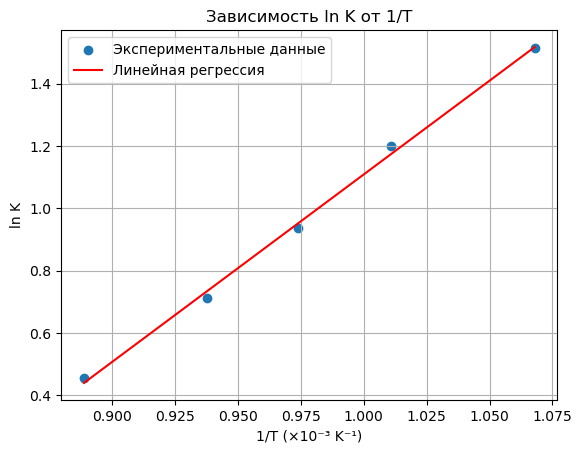

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Данные из таблицы
x_data = np.array([1.068, 1.011, 0.974, 0.938, 0.889])  # 1/T (×10⁻³ K⁻¹)
y_data = np.array([1.513, 1.200, 0.938, 0.711, 0.456])  # ln K

# Линейная регрессия
slope, intercept, r_value, p_value, std_err = linregress(x_data, y_data)

# Коэффициент детерминации R²
r_squared = r_value ** 2

# Вывод результатов
print(f"Уравнение регрессии: ln K = {slope:.3f} * (1/T) + {intercept:.3f}")
print(f"Коэффициент детерминации R² = {r_squared:.4f}")
print(f"Стандартная ошибка = {std_err:.4f}")

# Построение графика
plt.scatter(x_data, y_data, label='Экспериментальные данные')
plt.plot(x_data, slope * x_data + intercept, color='red', label='Линейная регрессия')
plt.xlabel('1/T (×10⁻³ K⁻¹)')
plt.ylabel('ln K')
plt.title('Зависимость ln K от 1/T')
plt.legend()
plt.grid(True)
plt.show()

1. Параметры уравнения БЭТ:
   C = 175.4
   n_m = 8.890e-04 моль/г

2. Удельная площадь поверхности:
   S = 87 м2/г


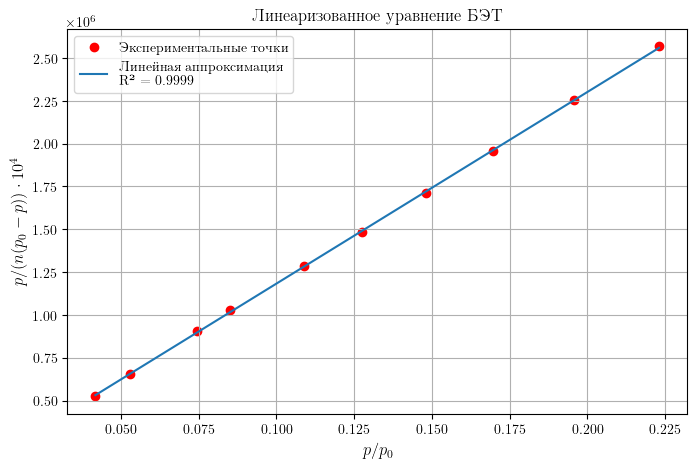

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",  
    "font.serif": ["Computer Modern"],
    "text.latex.preamble": r"""
        \usepackage[utf8]{inputenc}
        \usepackage[russian]{babel}
        \usepackage[T2A]{fontenc}
    """,
    "pgf.texsystem": "xelatex"
})

p = np.array([31.7, 40.1, 56.6, 64.5, 82.7, 96.7, 112.4, 128.8, 148.6, 169.3])  
n = np.array([8.31, 8.53, 8.90, 9.03, 9.53, 9.85, 10.15, 10.45, 10.81, 11.18]) * 1e-4  
p0 = 759.0  

x = p / p0  
y = (p / (n * (p0 - p))) * 1e4  

slope, intercept, r_value, p_value, std_err = linregress(x, y)

C = (slope / intercept) + 1
n_m = 1 / (intercept * 1e-4 * C)  

sigma = 16.2e-20  
N_A = 6.022e23     
S = n_m * N_A * sigma  

print("1. Параметры уравнения БЭТ:")
print(f"   C = {C:.1f}")
print(f"   n_m = {n_m:.3e} моль/г\n")

print("2. Удельная площадь поверхности:")
print(f"   S = {S:.0f} м2/г")

plt.figure(figsize=(8, 5))
plt.scatter(x, y, color='red', label='Экспериментальные точки')
plt.plot(x, slope*x + intercept, label=f'Линейная аппроксимация\nR² = {r_value**2:.4f}')
plt.xlabel(r'$p/p_0$', fontsize=12)
plt.ylabel(r'$p/(n(p_0-p)) \cdot 10^4$', fontsize=12)
plt.title('Линеаризованное уравнение БЭТ')
plt.legend()
plt.grid(True)
plt.savefig("test.png")
plt.show()


,n,slope,intercept,Vm (cm3/g),K (1/mmHg),R2
0,1,0.013267,3.132737,75.375904,0.004235,0.986174
1,2,0.004508,0.347069,221.818762,0.000169,0.922405
2,3,-0.005332,0.202627,-187.539986,-0.000018,0.863607
3,4,-0.015492,0.169142,-64.548701,0.000070,0.952165


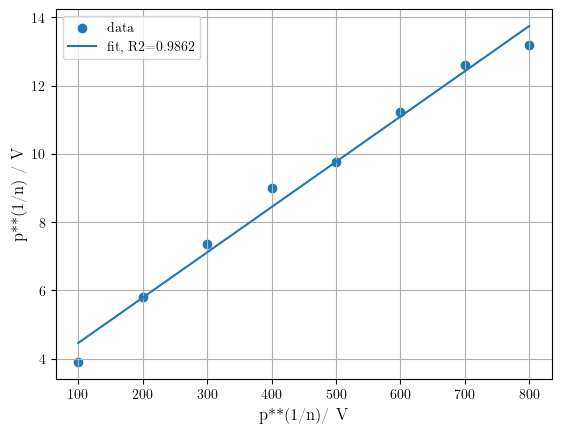

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
from IPython.display import display
p = np.array([100, 200, 300, 400, 500, 600, 700, 800], dtype=float)
V = np.array([25.64, 34.48, 40.81, 44.44, 51.28, 53.47, 55.55, 60.62], dtype=float)

results = []
for n_frag in [1, 2, 3, 4]:
    x = p ** (1 / n_frag)
    y = x / V
    slope, intercept, rval, _, _ = linregress(x, y)
    Vm = 1 / slope
    b = slope / intercept
    K = b ** n_frag
    results.append({
        'n': n_frag,
        'slope': slope,
        'intercept': intercept,
        'Vm (cm3/g)': Vm,
        'K (1/mmHg)': K,
        'R2': rval**2
    })

df = pd.DataFrame(results)
display(df)

n_frag = 1
x = p ** (1 / n_frag)
y = x / V
slope, intercept, rval, _, _ = linregress(x, y)

plt.scatter(x, y, label='data')
plt.plot(x, slope * x + intercept, label=f'fit, R2={rval**2:.4f}')
plt.xlabel('$p\\cdot(1/n) / V$', fontsize=12)
plt.ylabel('$p\\cdot(1/n) / V$', fontsize=12)
plt.legend()
plt.grid()
plt.show()


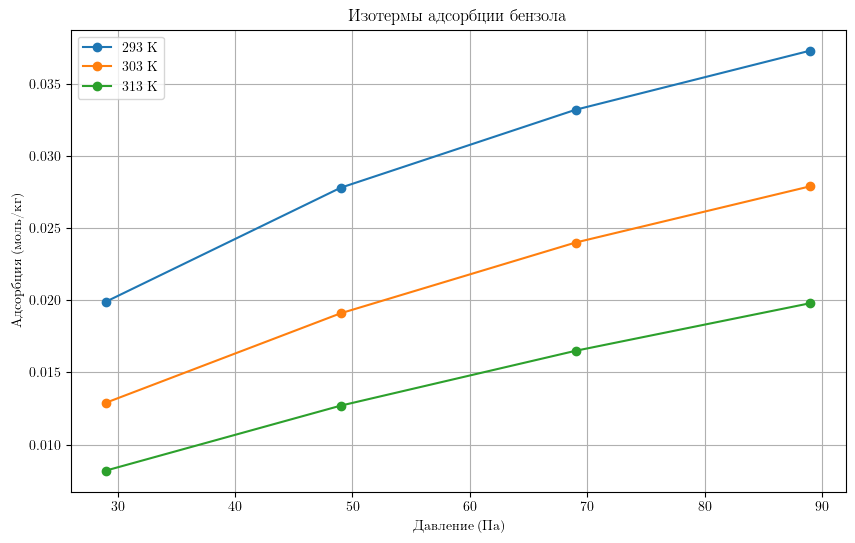


Параметры уравнения Лэнгмюра:


,T,A_m,K,R2
0,293,0.064619,0.015355,0.999977
1,303,0.063671,0.008759,0.999996
2,313,0.062347,0.005222,0.999998



Интегральная теплота адсорбции: -41125.96 кДж/моль
   A_fixed  ΔH_isost (J/mol)        R2
0    0.005     113208.753245  1.000000
1    0.010      85795.837810  0.949374
2    0.015      49773.454078  0.993014


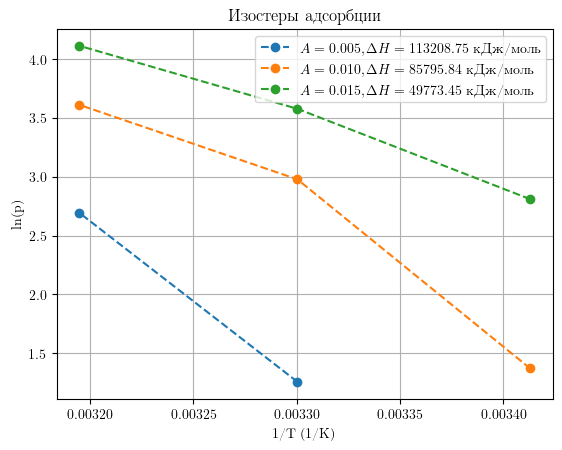

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.stats import linregress
from IPython.display import display

data = {
    'T': [293, 293, 293, 293, 293, 303, 303, 303, 303, 303, 313, 313, 313, 313, 313],
    'p': [0, 29, 49, 69, 89] * 3,
    'A': [0, 0.0199, 0.0278, 0.0332, 0.0373,
          0, 0.0129, 0.0191, 0.0240, 0.0279,
          0, 0.0082, 0.0127, 0.0165, 0.0198]
}
df = pd.DataFrame(data)


df = df[df['p'] != 0]

plt.figure(figsize=(10, 6))
for T in df['T'].unique():
    temp_df = df[df['T'] == T]
    plt.plot(temp_df['p'], temp_df['A'], 'o-', label=f'{T} K')
plt.xlabel('Давление (Па)')
plt.ylabel('Адсорбция (моль/кг)')
plt.legend()
plt.grid(True)
plt.title('Изотермы адсорбции бензола')
plt.savefig("task3_1.png")
plt.show()

results = []
for T in df['T'].unique():
    temp_df = df[df['T'] == T]
    x = 1 / temp_df['p'].values
    y = 1 / temp_df['A'].values
    
    slope, intercept, r_value, _, _ = linregress(x, y)
    A_m = 1 / intercept
    K = 1 / (slope * A_m)
    
    results.append({
        'T': T,
        'A_m': A_m,
        'K': K,
        'R2': r_value**2
    })

langmuir_df = pd.DataFrame(results)
print("\nПараметры уравнения Лэнгмюра:")
display(langmuir_df)

slope, intercept, _, _, _ = linregress(1/langmuir_df['T'], np.log(langmuir_df['K']))
delta_H_integral = -slope * 8.314
print(f"\nИнтегральная теплота адсорбции: {delta_H_integral:.2f} кДж/моль")

A_targets = [0.005, 0.01, 0.015]
results_iso = []

for A_fix in A_targets:
    ln_p_list = []
    invT_list = []
    for T in sorted(df['T'].unique()):
        temp = df[df['T'] == T]
        # Разрешаем экстраполяцию, но потом проверяем П>0
        f = interp1d(temp['A'], temp['p'], fill_value='extrapolate')
        p_val = f(A_fix)
        if p_val > 0:
            ln_p_list.append(np.log(p_val))
            invT_list.append(1.0 / T)
        else:
            # пропускаем некорректные точки
            continue

    # Требуется хотя бы 2 точки для регрессии
    if len(ln_p_list) >= 2:
        slope_iso, _, r_iso, _, _ = linregress(invT_list, ln_p_list)
        delta_H_iso = -slope_iso * 8.314  # Дж/моль
    else:
        delta_H_iso = float('nan')
        r_iso = float('nan')

    plt.plot(invT_list, ln_p_list, 'o--', 
             label=f'$A = {A_fix:.3f}, \\Delta H = {delta_H_iso:.2f}$ кДж/моль')
    
    results_iso.append({
        'A_fixed': A_fix,
        'ΔH_isost (J/mol)': delta_H_iso,
        'R2': r_iso**2
    })

iso_df = pd.DataFrame(results_iso)
print(iso_df)
    

plt.xlabel('1/T (1/K)')
plt.ylabel('ln(p)')
plt.legend()
plt.grid(True)
plt.title('Изостеры адсорбции')
plt.savefig("task3_2.png")
plt.show()

In [ ]:
w